# SOCIAL NETWORK ANALYSIS ASSIGNMENT
##  STRUCTURAL BALANCE ANALYSIS





## Group Memebers :
  ### Sushil Mahato  -  19352061
  ### Nirmal Mahata  -  19352035
  ### Benand Singh   -  19352069
  ### Ekta Prakash   -   19352017

## Importing the modules



In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Initializing the Graphs

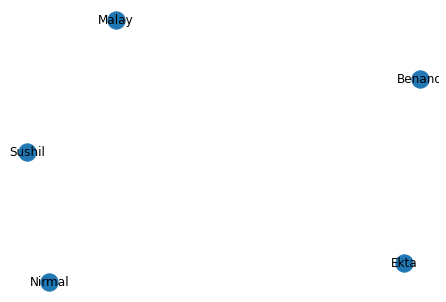

In [4]:
G = nx.Graph()
n = 5 
G.add_nodes_from([i for i in range(1, n+1)])

mapping = {1:'Sushil', 2:'Nirmal', 3:'Benand', 4:'Ekta', 5:'Malay'}      
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True)
plt.show()


## Assign edges with sign to the graph


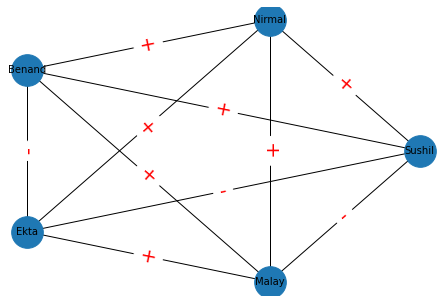

In [5]:
import random
signs  = ['+', '-']
for i in G.nodes():
    for j in G.nodes():
        if i != j:
            G.add_edge(i, j, sign=random.choice(signs))   # Sign is assigning randomly
            
##   To display the graph

edge_labels = nx .get_edge_attributes(G, 'sign')            
pos = nx.circular_layout(G)
nx.draw(G, pos, font_size = 10, node_size=1000, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20, font_color='red')
plt.show()



## Structural Balance Analysis

##  list of all the triangles in the network

In [6]:
node = G.nodes()
node

NodeView(('Sushil', 'Nirmal', 'Benand', 'Ekta', 'Malay'))

In [7]:
import itertools
triangle_list = []
for i in itertools.combinations(node, 3):
     triangle_list.append(list(i))
        
triangle_list  

[['Sushil', 'Nirmal', 'Benand'],
 ['Sushil', 'Nirmal', 'Ekta'],
 ['Sushil', 'Nirmal', 'Malay'],
 ['Sushil', 'Benand', 'Ekta'],
 ['Sushil', 'Benand', 'Malay'],
 ['Sushil', 'Ekta', 'Malay'],
 ['Nirmal', 'Benand', 'Ekta'],
 ['Nirmal', 'Benand', 'Malay'],
 ['Nirmal', 'Ekta', 'Malay'],
 ['Benand', 'Ekta', 'Malay']]

## Sign details of each triangle

In [8]:
def triangle_signs(traingle_list, G):
    triangleSignList = []
    for i in range(len(triangle_list)):
        temp = []
        
        edge1 = G[triangle_list[i][0]][triangle_list[i][1]]['sign']
        temp.append(edge1)
        
        edge2 = G[triangle_list[i][1]][triangle_list[i][2]]['sign']
        temp.append(edge2)
                    
        edge3 = G[triangle_list[i][2]][triangle_list[i][0]]['sign']
        temp.append(edge3)
        
#         print(temp)
        triangleSignList.append(temp)
    return triangleSignList                     
                                                           
    

triangleSignList = triangle_signs(triangle_list, G)
triangleSignList

[['+', '+', '+'],
 ['+', '+', '-'],
 ['+', '+', '-'],
 ['+', '-', '-'],
 ['+', '+', '-'],
 ['-', '+', '-'],
 ['+', '-', '+'],
 ['+', '+', '+'],
 ['+', '+', '+'],
 ['-', '+', '+']]

## Checking the network is balanced or not

In [9]:
def checkBalance(triangleSignList):
    balanced = 0
    unbalanced = 0
    for i in range(len(triangleSignList)):
        if triangleSignList[i].count('+') == 1 or triangleSignList[i].count('+') == 3:
            balanced += 1
        else:
            unbalanced += 1
    if unbalanced > 0:
        print('The network is Unbalanced...')
        print('Number of Unbalanced triangle = ', unbalanced)
    else:
        print('Network is balanced...')
        print('Total balanced triangle = ', balanced)
        
checkBalance(triangleSignList)

The network is Unbalanced...
Number of Unbalanced triangle =  5


## Checking structural  balance by counting - from cycles
### If there is odd number of - edges in any cycle of the network then the network is Unbalanced

In [10]:
cycles = nx.cycle_basis(G)
print(cycles)
len(cycles)

[['Sushil', 'Ekta', 'Malay'], ['Nirmal', 'Ekta', 'Malay'], ['Benand', 'Ekta', 'Malay'], ['Sushil', 'Benand', 'Malay'], ['Nirmal', 'Benand', 'Malay'], ['Sushil', 'Nirmal', 'Malay']]


6

In [11]:
for cycle in cycles:
    flag = True
    signCycle = []
    for i in range(len(cycle)):
        sign = G[cycle[i]][cycle[(i+1) % len(cycle)]]['sign']
#         print(sign)
        signCycle.append(sign)
     
    print(signCycle) 
    if signCycle.count('-') % 2 != 0:
        print('Unbalanced Network')
        flag = False
        break
if flag:
    print('Balanced Network')
        
    
        

['-', '+', '-']
['+', '+', '+']
['-', '+', '+']
Unbalanced Network
